In [32]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Data.csv')
data.head()

,Unnamed: 0,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [33]:
# Converting 'InvoiceDate' to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
missing_values = data.isnull().sum()

# Check data types and missing values
data_types = data.dtypes
data_types, missing_values

(Unnamed: 0              int64
 Description            object
 Quantity                int64
 InvoiceDate    datetime64[ns]
 UnitPrice             float64
 CustomerID            float64
 Country                object
 dtype: object,
 Unnamed: 0          0
 Description      1454
 Quantity            0
 InvoiceDate         0
 UnitPrice           0
 CustomerID     135080
 Country             0
 dtype: int64)

In [34]:
# Filter out transactions with missing CustomerID
data_cleaned = data.dropna(subset=['CustomerID'])

# Create a TotalPrice column
data_cleaned['TotalPrice'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']

# Aggregate data at the customer level
customer_data = data_cleaned.groupby('CustomerID').agg(
    TotalSpending=pd.NamedAgg(column='TotalPrice', aggfunc='sum'),
    AverageSpending=pd.NamedAgg(column='TotalPrice', aggfunc='mean'),
    TransactionCount=pd.NamedAgg(column='TotalPrice', aggfunc='count'),
    MostRecentPurchase=pd.NamedAgg(column='InvoiceDate', aggfunc='max')
)

# Calculate recency in days
last_date = data_cleaned['InvoiceDate'].max()
customer_data['Recency'] = (last_date - customer_data['MostRecentPurchase']).dt.days
customer_data = customer_data.drop('MostRecentPurchase', axis=1)

customer_data.head()

customer_data.to_csv("clean_data.csv")

/var/folders/n4/mj6y_ncs665glmnkl_kh5m380000gn/T/ipykernel_14834/1350269513.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['TotalPrice'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']


,TotalSpending,AverageSpending,TransactionCount,Recency
CustomerID,,,,
12346.0,0.00,0.000000,2,325
12347.0,4310.00,23.681319,182,1
12348.0,1797.24,57.975484,31,74
12349.0,1757.55,24.076027,73,18
12350.0,334.40,19.670588,17,309


/Users/vincent/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vincent/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vincent/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vincent/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

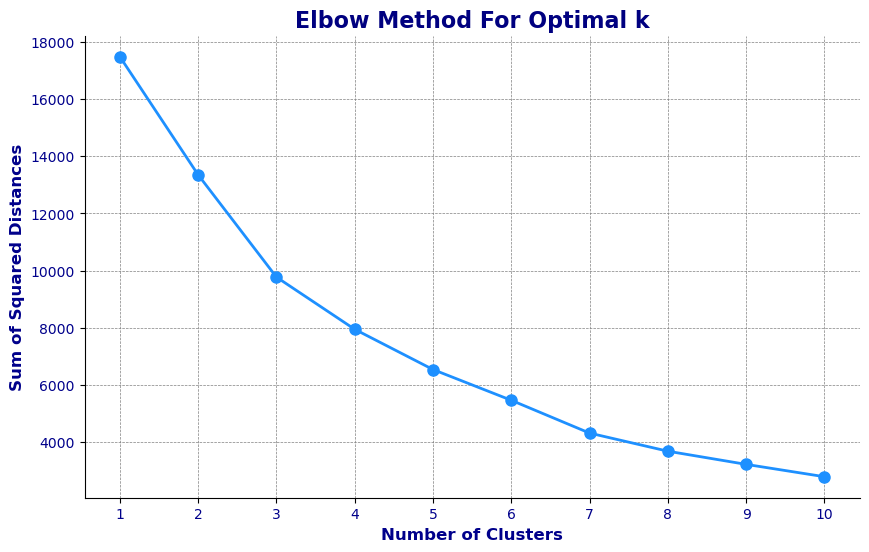

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Prepare the features for clustering
data = pd.read_csv('clean_data.csv')
features = data[['TotalSpending', 'AverageSpending', 'TransactionCount', 'Recency']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Applying K-means and using the elbow method to find the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='-', color='dodgerblue', linewidth=2, markersize=8)
plt.title('Elbow Method For Optimal k', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Number of Clusters', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Sum of Squared Distances', fontsize=12, fontweight='bold', color='darkblue')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.xticks(range(1, 11), fontsize=10, color='darkblue')
plt.yticks(fontsize=10, color='darkblue')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [27]:
# Perform K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(features_scaled)

# Assign the clusters to each record in the dataframe
data['Cluster'] = kmeans.labels_

data.head()
data.to_csv("clustering_res.csv")

/Users/vincent/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CustomerID,TotalSpending,AverageSpending,TransactionCount,Recency,Cluster
0,12346.0,0.00,0.000000,2,325,1
1,12347.0,4310.00,23.681319,182,1,0
2,12348.0,1797.24,57.975484,31,74,0
3,12349.0,1757.55,24.076027,73,18,0
4,12350.0,334.40,19.670588,17,309,1


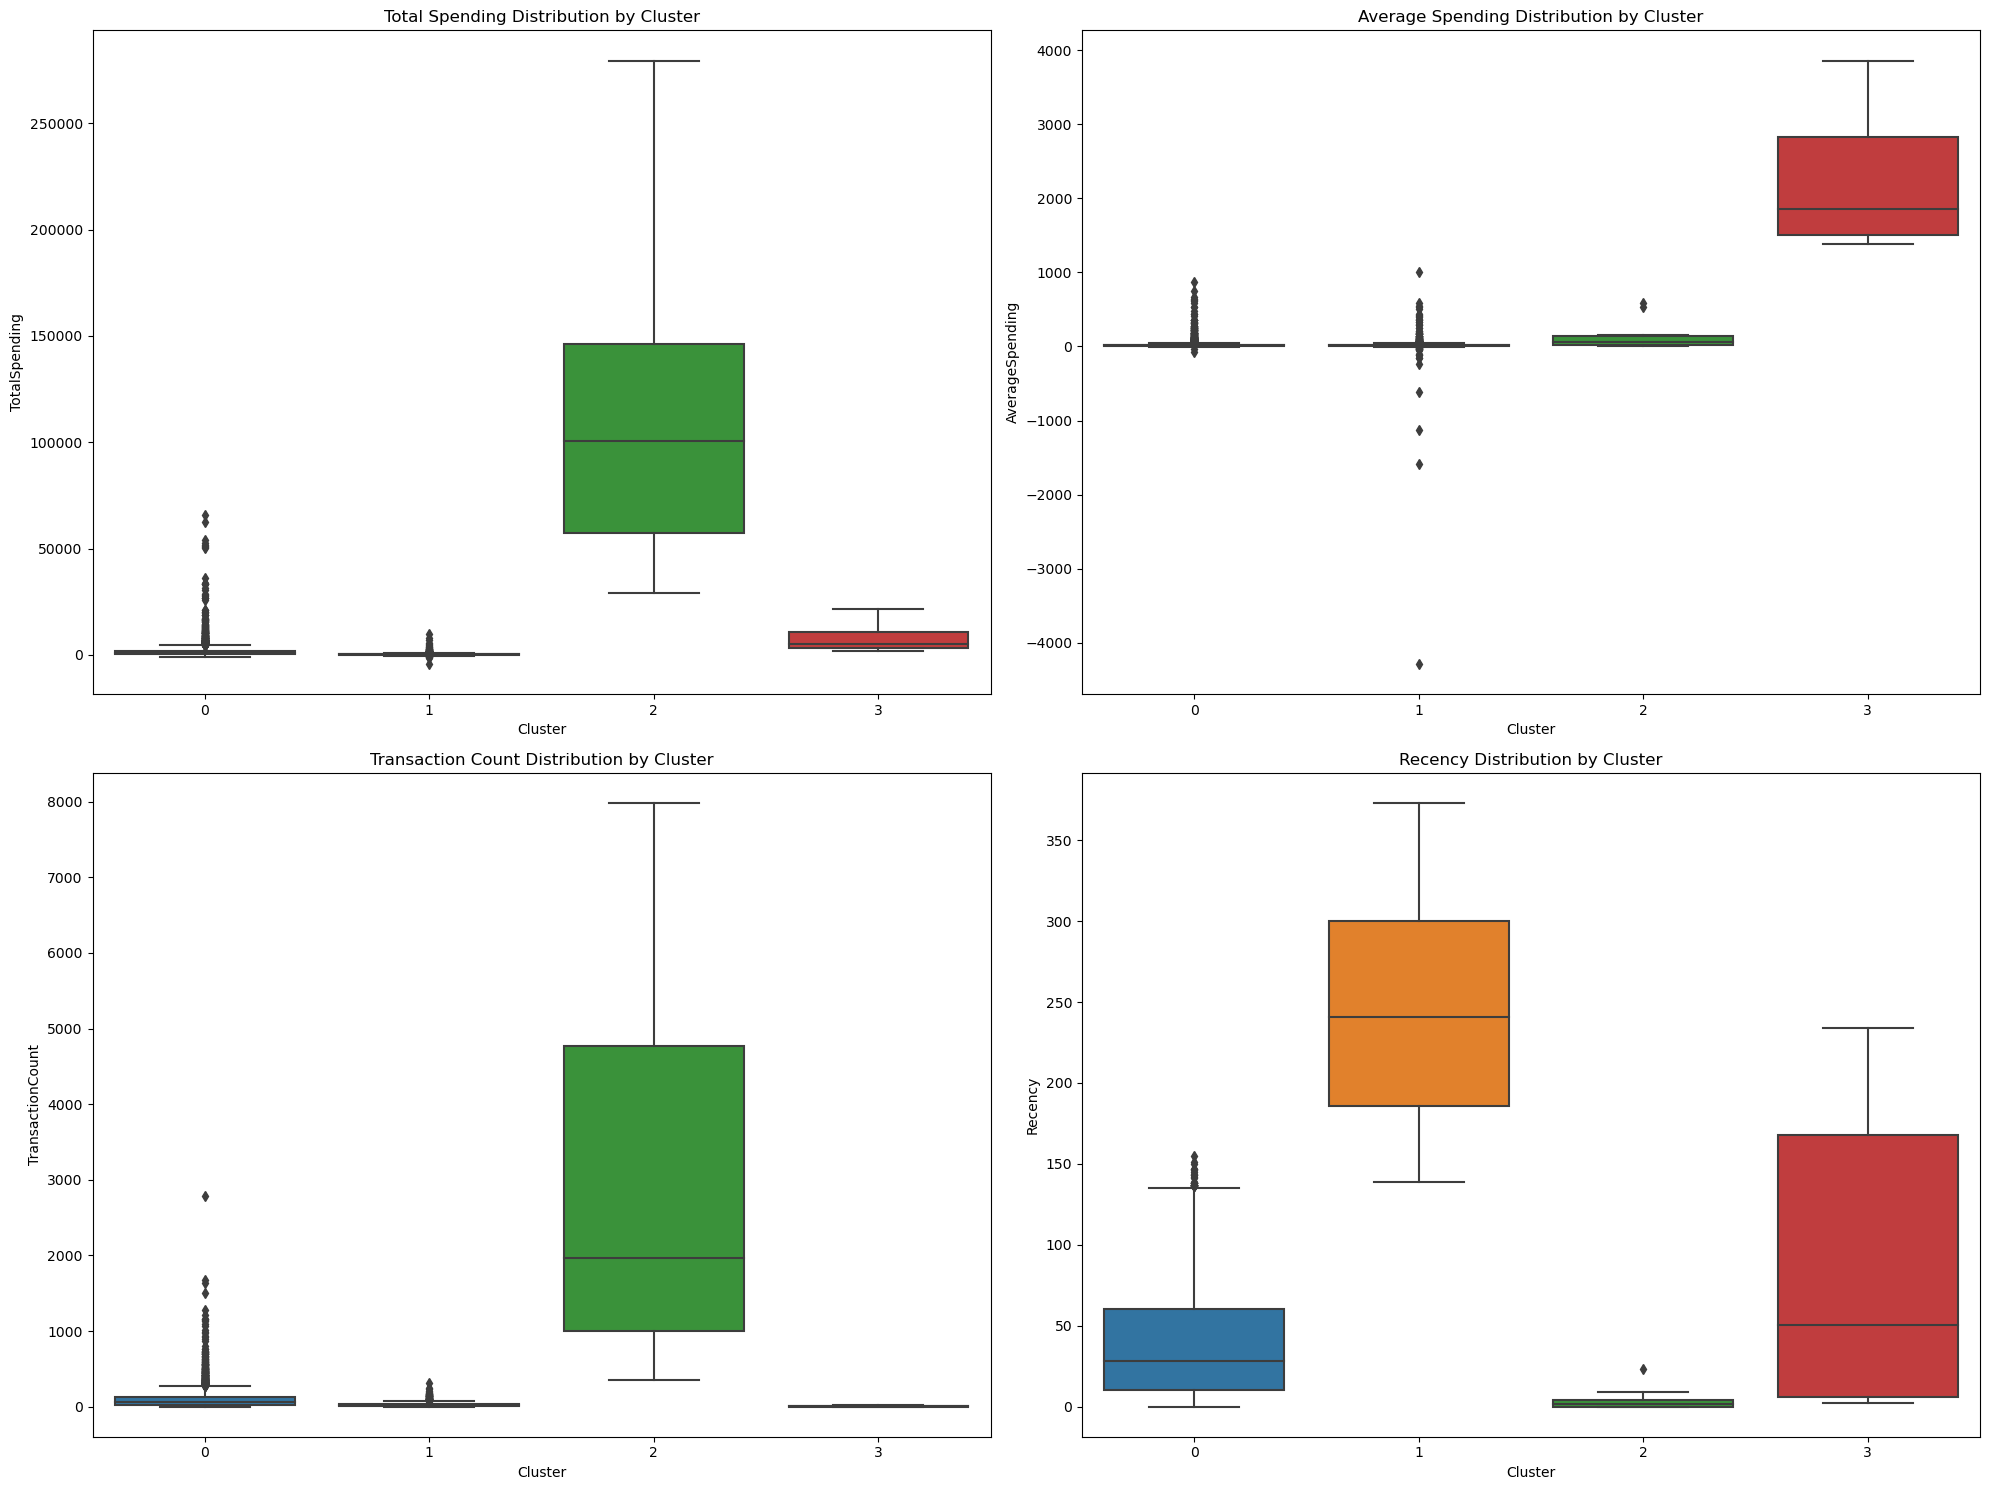

TotalSpending                                                 \
                  mean      median           std       min        max   
Cluster                                                                 
0          1946.245636     901.205   4003.085319  -1165.30   65892.08   
1           442.493386     296.815    691.246288  -4287.63    9861.38   
2        118713.023333  100754.760  83107.644352  29072.10  279489.02   
3          8278.083333    5304.900   7488.806854   2033.10   21535.90   

        AverageSpending                                                      \
                   mean       median          std          min          max   
Cluster                                                                       
0             26.838728    17.025455    49.977253   -77.686667   872.130000   
1             21.416620    16.544750   158.147280 -4287.630000  1001.200000   
2            140.072521    55.375226   204.308838     5.053336   592.236697   
3           2248.350741  1860.150000  1009.935087  1377.077778  3861.000000   

        TransactionCount                                     Recency         \
                    mean  median          std  min   max        mean median   
Cluster                                                                       
0             105.023327    57.0   148.317302    1  2782   39.207489   28.0   
1              27.814781    18.0    32.245681    1   312  246.110401  240.5   
2            2845.583333  1971.0  2474.249508  351  7983    4.000000    1.5   
3               5.166667     2.5     5.741661    1    15   89.166667   50.5   

                               
                std  min  max  
Cluster                        
0         35.346314    0  155  
1         67.977942  139  373  
2          6.646941    0   23  
3        102.782132    2  234

In [31]:
import seaborn as sns

# Get descriptive statistics for each cluster
cluster_descriptive_stats = data.groupby('Cluster').agg({
    'TotalSpending': ['mean', 'median', 'std', 'min', 'max'],
    'AverageSpending': ['mean', 'median', 'std', 'min', 'max'],
    'TransactionCount': ['mean', 'median', 'std', 'min', 'max'],
    'Recency': ['mean', 'median', 'std', 'min', 'max']
})

# Visualizations
plt.figure(figsize=(20, 15))

# Total Spending Distribution
plt.subplot(2, 2, 1)
sns.boxplot(x='Cluster', y='TotalSpending', data=data)
plt.title('Total Spending Distribution by Cluster')

# Average Spending Distribution
plt.subplot(2, 2, 2)
sns.boxplot(x='Cluster', y='AverageSpending', data=data)
plt.title('Average Spending Distribution by Cluster')

# Transaction Count Distribution
plt.subplot(2, 2, 3)
sns.boxplot(x='Cluster', y='TransactionCount', data=data)
plt.title('Transaction Count Distribution by Cluster')

# Recency Distribution
plt.subplot(2, 2, 4)
sns.boxplot(x='Cluster', y='Recency', data=data)
plt.title('Recency Distribution by Cluster')

# Show the plots
plt.tight_layout()
plt.show()

cluster_descriptive_stats


### Cluster 0:
These customers shop quite often and spend a moderate amount each time. They've made a purchase relatively recently, so they seem to be regulars who are actively engaging with the store.

### Cluster 1:
Customers in this group don't spend much overall, and their purchases are infrequent and small in value. They haven't shopped recently, which might suggest they are occasional shoppers or have not returned to the store for some time.

### Cluster 2:
This is a small, exclusive group of customers who spend a lot and shop very frequently. Their last purchase was very recent, making them highly valuable and engaged shoppers.

### Cluster 3:
These customers tend to make fewer purchases, but when they do, they spend a lot on each transaction. They've made a purchase in the not-so-distant past, so they appear to be customers who come in less often but are high spenders, possibly buying premium products.